# Dicas

Esse notebook tem a intenção de ensinar algumas dicas básicas que podem ser úteis no dia a dia de quem usa python para manipular os dados meteorológicos. Aqui vamos falar um pouco de:
- Organização de scripts
- Instalação de pacotes
- Ferramentas para a edição de código
- Outros pacotes que possam ser úteis para aplicações específicas

## Organização de scripts

```python
import numpy as np
import pandas as pd

from glob import glob

from model.lib.model import AttributionModel

def speco(C):
    """
    This function computes eigenvalues and eigenvectors, in descending order
    :param C: numpy.ndarray
        A p x p symetric real matrix
    :return:
    P: numpy.ndarray
        The eigenvectors (P[:, i] is the ist eigenvector)
    D: numpy.ndarray
        The eigenvalues as a diagonal matrix
    """

    # Compute eigenvalues and eigenvectors (the eigenvectors are non unique so
    # the values may change from one software to another e.g. python, matlab,
    # scilab)
    D0, P0 = np.linalg.eig(C)

    # Take real part (to avoid numeric noise, eg small complex numbers)
    if np.max(np.imag(D0)) / np.max(np.real(D0)) > 1e-12:
        raise ValueError("Matrix is not symmetric")   

    # Check that C is symetric (<=> real eigen-values/-vectors)
    P1 = np.real(P0)
    D1 = np.real(D0)

    # sort eigenvalues in descending order and
    # get their indices to order the eigenvector
    Do = np.sort(D1)[::-1]
    o = np.argsort(D1)[::-1]

    P = P1[:, o]
    D = np.diag(Do)

    return P, D


# <adicionar código depois de definir as funções>


```

<div class="alert alert-block alert-info">
<b>Importante</b>

<li> Importar primeiro funções básicas em seguida "subfunções" e por fim as funções definidas pelo usuário. Cada bloco deve ser separado por um espaço e deve respeitar a ordem alfabética.
<li> Documentação! Sempre que escrever uma função escreva que tipos de argumento ela recebe, de que tipo elas são e o que é retornado pela função.
<li> Não se esqueça de comentar o código. Isso será útil para você no futuro e para alguma pessoa que possa vir a uar o seu código. Um ponto importante é que comentários não devem ser óbvios!
<li> Tente escrever os comentários e documentação em inglês. Isso torna o código universal. Escreva apenas em português se você tem certeza que mais ninguém que não seja do seu país vai usar
<br>
<br>
Muitas informações a mais sobre como deixar seu código padronizado são descritas em: https://pep8.org/
</div>

## Instalação de pacotes

A ferramenta anaconda é útil para a instalação de pacotes já que possui várias bibliotecas pré compiladas que podem ser instaladas apenas com o comando `conda install`. https://www.anaconda.com/

Com o anaconda instalado você pode instalar pacotes com o comando:

`conda install cartopy`

Caso você queira especificar um canal para instalar os pacotes:

`conda install -c conda-forge cartopy`

Caso o pacote que você tentou instalar não seja encontrado você pode procurar algum canal que possua:

```
anaconda search -t conda metpy

Using Anaconda API: https://api.anaconda.org
Run 'anaconda show <USER/PACKAGE>' to get more details:
Packages:
     Name                      |  Version | Package Types   | Platforms      
     ------------------------- |   ------ | --------------- | ---------------
     Unidata/MetPy             |    0.8.0 | conda           | linux-64, win-32, win-64, linux-32, osx-64
                                          : MetPy is a collection of tools in Python for reading, visualizing and performing calculations with weather data.
     conda-forge/metpy         |   0.10.0 | conda           | linux-64, win-32, win-64, osx-64
                                          : MetPy is a collection of tools in Python for reading, visualizing and performing calculations with weather data.
     scw/metpy                 |   0.10.0 | conda           | win-64         
                                          : A collection of tools for reading, visualizing and analyzing weather data.
Found 3 packages

```

E então instalar selecionando o canal que você quer:

`conda install -c conda-forge metpy`

Para remover um pacote:

`conda remove metpy`

A criação de ambientes de desenvolvimento também é interessante:

`conda create --name myenv python=2.7`

Para criar um ambiente vazio (sem nenhum pacote) ou para criar um ambiente com todos os pacotes do anaconda:

`conda create --name myenv anaconda python=2.7`

Para ativar um ambiente:

`source activate myenv`

Para desativar:

`source deactivate myenv`

<div class="alert alert-block alert-info">
<b>Importante</b>
<br>
A criação de ambientes é interessante para organizar projetos que dependam de um conjunto de bibliotecas diferentes. Outra utilidade é instalar pacotes que possam ser incompatíveis com outros de um determinado ambiente, evitando que esse ambiente seja modificado (pacotes atualizados ou desatualizados).
</div>

## Ferramentas para edição de código

- PyCharm https://www.jetbrains.com/pycharm/
- Spyder https://www.spyder-ide.org/
- Sublime https://www.sublimetext.com/
- Jupyter Notebook

## Outros pacotes

- multiprocessing (processamento em paralelo) https://docs.python.org/2/library/multiprocessing.html
- Keras (machine learning) https://keras.io/
- Scikit-Learn (machine learning) https://scikit-learn.org/
- Statsmodels (estatística e análise de séries temporais) https://www.statsmodels.org/stable/index.html
- Seaborn (visualização) https://seaborn.pydata.org/
- F2PY (híbrido Fortran/Python) https://docs.scipy.org/doc/numpy/f2py/
- Metpy (funções meteorológicas úteis) https://unidata.github.io/MetPy/latest/index.html
- wrf-python (funções úteis para lidar com saída do modelo WRF) https://wrf-python.readthedocs.io/en/latest/
- Salem (Plotar mapas - possui algumas funções interessantes para lidar com shapefiles e para ler dados do WRF) https://salem.readthedocs.io/en/v0.2.3/
- Luigi/Airflow (Gerenciamento de pipelines de atividades) https://luigi.readthedocs.io/en/stable/ e https://airflow.apache.org/

Muitos outros...

## Vídeos úteis

Transforming Code into Scientific Contributions | SciPy Japan 2019

[![IMAGE ALT TEXT](http://img.youtube.com/vi/8HnvYTvjDXM/0.jpg)](https://www.youtube.com/watch?v=8HnvYTvjDXM "Transforming Code into Scientific Contributions | SciPy Japan 2019")

MetPy Mondays

[![IMAGE ALT TEXT](http://img.youtube.com/vi/i_P98aBiTsg/0.jpg)](https://www.youtube.com/watch?v=i_P98aBiTsg "MetPy Mondays #82 - Multiprocessing")


Dica final, use e abuse do Stack Overflow! Se você teve uma dúvida há grande chances de ela já ter sido perguntada no site

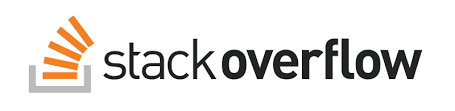